In [16]:
import os, cv2, glob, random, math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import segmentation_models as sm
from tensorflow.keras.utils import normalize
from numpy import asarray, clip
from keras.models import Model, Sequential, load_model

In [17]:
s = 512
#img = cv2.imread('data/1. Foto_drone_ketinggian_50_meter.JPG',3)
img1 = cv2.imread('data/sawit/Data Oil Palm/train_palm/0045.jpg', 3)

imgRGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
imgYUV = cv2.cvtColor(img1, cv2.COLOR_BGR2YUV)
imgYCrCb = cv2.cvtColor(img1, cv2.COLOR_BGR2YCrCb)

In [18]:
imgOri= cv2.resize(img1, (s,s))
imgOri = np.expand_dims(imgOri, axis=0)
imgOri = imgOri/255.0     #.astype('float32')

In [19]:
#equalize the histogram
imgRGB[:,:,2] = cv2.equalizeHist(imgRGB[:,:,2])
#imgHE_RGB = cv2.medianBlur(imgRGB,7)
#imgHE_RGB = cv2.GaussianBlur(imgRGB, (7, 7), 0.5)
imgHE_RGB = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2BGR)

imgHE_RGB = cv2.resize(imgHE_RGB, (s,s))

img_array_HERGB = np.expand_dims(imgHE_RGB, axis=0)
#img_arrayHE = normalize(img_arrayHE, axis=1)
img_array_HERGB = img_array_HERGB/255.0     #.astype('float32')
#print(img_array_HERGB)

In [20]:
#equalize the histogram of the Y channel
imgYUV[:,:,2] = cv2.equalizeHist(imgYUV[:,:,2])
#imgHE_YUV = cv2.medianBlur(imgYUV,7)
#imgHE_YUV = cv2.GaussianBlur(imgYUV, (7, 7), 0.5)
imgHE_YUV = cv2.cvtColor(imgYUV, cv2.COLOR_YUV2BGR)

imgHE_YUV = cv2.resize(imgHE_YUV, (s,s))

img_array_HEYUV = np.expand_dims(imgHE_YUV, axis=0)
img_array_HEYUV = img_array_HEYUV/255.0     #.astype('float32')
#print(img_array_HEYUV)

In [21]:
#equalize the histogram of the Y channel
imgYCrCb[:,:,2] = cv2.equalizeHist(imgYCrCb[:,:,2])
#imgHE_YCrCb = cv2.medianBlur(imgYCrCb,7)
#imgHE_YCrCb = cv2.GaussianBlur(imgYCrCb, (7, 7), 0.5)
imgHE_YCrCb = cv2.cvtColor(imgYCrCb, cv2.COLOR_YCrCb2BGR)

imgHE_YCrCb = cv2.resize(imgHE_YCrCb, (s,s))

img_array_HEYCrCb = np.expand_dims(imgHE_YCrCb, axis=0)
img_array_HEYCrCb = img_array_HEYCrCb/255.0     #.astype('float32')
#print(img_array_HEYCrCb)

In [22]:
input_shape = (img_array_HERGB.shape[1], img_array_HERGB.shape[2], img_array_HERGB.shape[3])
print(input_shape)
sm.set_framework('tf.keras')
sm.framework()


BACKBONE1 = 'vgg16'
preprocess_input = sm.get_preprocessing(BACKBONE1)
model1 = sm.Unet(BACKBONE1,input_shape=input_shape, weights=None,
                encoder_weights=None, classes=3,
                activation='sigmoid',decoder_filters=(128, 64, 32, 32, 16),
                decoder_block_type = 'transpose')

BACKBONE2 = 'vgg19'
preprocess_input = sm.get_preprocessing(BACKBONE2)
model2 = sm.Unet(BACKBONE2,input_shape=input_shape, weights=None,
                encoder_weights=None, classes=3,
                activation='sigmoid',decoder_filters=(128, 64, 32, 32, 16),
                decoder_block_type = 'transpose')


(512, 512, 3)


In [23]:
model1.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(),metrics =(['accuracy']))
model2.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(),metrics =(['accuracy']))

In [24]:
hitM1HE_rgb = model1.fit(img_array_HERGB, img_array_HERGB, epochs=30, shuffle=False)

Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 1.6587 - accuracy: 0.3938
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 1.5408 - accuracy: 0.4321
Epoch 3/30
1/1 [==============================] - 5s 5s/step - loss: 1.5831 - accuracy: 0.4285
Epoch 4/30
1/1 [==============================] - 4s 4s/step - loss: 1.5409 - accuracy: 0.4515
Epoch 5/30
1/1 [==============================] - 4s 4s/step - loss: 1.5143 - accuracy: 0.4746
Epoch 6/30
1/1 [==============================] - 4s 4s/step - loss: 1.5029 - accuracy: 0.4770
Epoch 7/30
1/1 [==============================] - 5s 5s/step - loss: 1.4958 - accuracy: 0.5050
Epoch 8/30
1/1 [==============================] - 5s 5s/step - loss: 1.4948 - accuracy: 0.5326
Epoch 9/30
1/1 [==============================] - 5s 5s/step - loss: 1.5037 - accuracy: 0.5422
Epoch 10/30
1/1 [==============================] - 4s 4s/step - loss: 1.5100 - accuracy: 0.5280
Epoch 11/30
1/1 [==============================] 

In [25]:
hitM1HE_yuv = model1.fit(img_array_HEYUV, img_array_HEYUV, epochs=30, shuffle=False)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 1.6255 - accuracy: 0.2202
Epoch 2/30
1/1 [==============================] - 5s 5s/step - loss: 1.6218 - accuracy: 0.2202
Epoch 3/30
1/1 [==============================] - 5s 5s/step - loss: 1.6190 - accuracy: 0.2199
Epoch 4/30
1/1 [==============================] - 4s 4s/step - loss: 1.6162 - accuracy: 0.2207
Epoch 5/30
1/1 [==============================] - 4s 4s/step - loss: 1.6128 - accuracy: 0.2237
Epoch 6/30
1/1 [==============================] - 5s 5s/step - loss: 1.6082 - accuracy: 0.2294
Epoch 7/30
1/1 [==============================] - 4s 4s/step - loss: 1.6031 - accuracy: 0.2361
Epoch 8/30
1/1 [==============================] - 4s 4s/step - loss: 1.5989 - accuracy: 0.2415
Epoch 9/30
1/1 [==============================] - 4s 4s/step - loss: 1.5948 - accuracy: 0.2454
Epoch 10/30
1/1 [==============================] - 5s 5s/step - loss: 1.5892 - accuracy: 0.2507
Epoch 11/30
1/1 [==============================] 

In [26]:
hitM1HE_ycrcb = model1.fit(img_array_HEYCrCb, img_array_HEYCrCb, epochs=30, shuffle=False)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 1.5838 - accuracy: 0.3745
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 1.5873 - accuracy: 0.3690
Epoch 3/30
1/1 [==============================] - 4s 4s/step - loss: 1.5725 - accuracy: 0.3799
Epoch 4/30
1/1 [==============================] - 4s 4s/step - loss: 1.5581 - accuracy: 0.3852
Epoch 5/30
1/1 [==============================] - 4s 4s/step - loss: 1.5524 - accuracy: 0.3861
Epoch 6/30
1/1 [==============================] - 4s 4s/step - loss: 1.5443 - accuracy: 0.3943
Epoch 7/30
1/1 [==============================] - 4s 4s/step - loss: 1.5321 - accuracy: 0.4108
Epoch 8/30
1/1 [==============================] - 4s 4s/step - loss: 1.5250 - accuracy: 0.4210
Epoch 9/30
1/1 [==============================] - 4s 4s/step - loss: 1.5222 - accuracy: 0.4292
Epoch 10/30
1/1 [==============================] - 4s 4s/step - loss: 1.5163 - accuracy: 0.4387
Epoch 11/30
1/1 [==============================] 

In [27]:
hitM2HE_rgb = model2.fit(img_array_HERGB, img_array_HERGB, epochs=30, shuffle=False)

Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 1.7226 - accuracy: 0.5129
Epoch 2/30
1/1 [==============================] - 5s 5s/step - loss: 1.6628 - accuracy: 0.5891
Epoch 3/30
1/1 [==============================] - 6s 6s/step - loss: 1.6150 - accuracy: 0.6745
Epoch 4/30
1/1 [==============================] - 5s 5s/step - loss: 1.5876 - accuracy: 0.7073
Epoch 5/30
1/1 [==============================] - 5s 5s/step - loss: 1.5552 - accuracy: 0.7121
Epoch 6/30
1/1 [==============================] - 5s 5s/step - loss: 1.5457 - accuracy: 0.7185
Epoch 7/30
1/1 [==============================] - 5s 5s/step - loss: 1.5309 - accuracy: 0.7260
Epoch 8/30
1/1 [==============================] - 5s 5s/step - loss: 1.5222 - accuracy: 0.7384
Epoch 9/30
1/1 [==============================] - 5s 5s/step - loss: 1.5205 - accuracy: 0.7533
Epoch 10/30
1/1 [==============================] - 5s 5s/step - loss: 1.5198 - accuracy: 0.7582
Epoch 11/30
1/1 [==============================] 

In [28]:
hitM2HE_yuv = model2.fit(img_array_HEYUV, img_array_HEYUV, epochs=30, shuffle=False)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 1.4139 - accuracy: 0.1037
Epoch 2/30
1/1 [==============================] - 5s 5s/step - loss: 1.4230 - accuracy: 0.1025
Epoch 3/30
1/1 [==============================] - 5s 5s/step - loss: 1.4310 - accuracy: 0.1038
Epoch 4/30
1/1 [==============================] - 5s 5s/step - loss: 1.4351 - accuracy: 0.1064
Epoch 5/30
1/1 [==============================] - 5s 5s/step - loss: 1.4343 - accuracy: 0.1108
Epoch 6/30
1/1 [==============================] - 5s 5s/step - loss: 1.4297 - accuracy: 0.1186
Epoch 7/30
1/1 [==============================] - 5s 5s/step - loss: 1.4241 - accuracy: 0.1321
Epoch 8/30
1/1 [==============================] - 5s 5s/step - loss: 1.4191 - accuracy: 0.1500
Epoch 9/30
1/1 [==============================] - 5s 5s/step - loss: 1.4159 - accuracy: 0.1712
Epoch 10/30
1/1 [==============================] - 5s 5s/step - loss: 1.4145 - accuracy: 0.1922
Epoch 11/30
1/1 [==============================] 

In [29]:
hitM2HE_ycrcb = model2.fit(img_array_HEYCrCb, img_array_HEYCrCb, epochs=30, shuffle=False)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 1.5074 - accuracy: 0.3428
Epoch 2/30
1/1 [==============================] - 5s 5s/step - loss: 1.5104 - accuracy: 0.3139
Epoch 3/30
1/1 [==============================] - 5s 5s/step - loss: 1.5063 - accuracy: 0.3100
Epoch 4/30
1/1 [==============================] - 5s 5s/step - loss: 1.4939 - accuracy: 0.3324
Epoch 5/30
1/1 [==============================] - 5s 5s/step - loss: 1.4796 - accuracy: 0.3509
Epoch 6/30
1/1 [==============================] - 6s 6s/step - loss: 1.4687 - accuracy: 0.3525
Epoch 7/30
1/1 [==============================] - 5s 5s/step - loss: 1.4608 - accuracy: 0.3457
Epoch 8/30
1/1 [==============================] - 5s 5s/step - loss: 1.4540 - accuracy: 0.3388
Epoch 9/30
1/1 [==============================] - 5s 5s/step - loss: 1.4453 - accuracy: 0.3381
Epoch 10/30
1/1 [==============================] - 5s 5s/step - loss: 1.4340 - accuracy: 0.3437
Epoch 11/30
1/1 [==============================] 

(-0.5, 511.5, 511.5, -0.5)

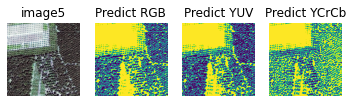

In [30]:
pred1 = model1.predict(img_array_HERGB)
pred2 = model1.predict(img_array_HEYUV)
pred3 = model1.predict(img_array_HEYCrCb)
pred4 = model2.predict(img_array_HERGB)
pred5 = model2.predict(img_array_HEYUV)
pred6 = model2.predict(img_array_HEYCrCb)


# Show image result
#plt.Figure(figsize=(3,2))
plt.subplot(141)
plt.imshow(img1)
plt.title('image5')
plt.axis('off')
plt.subplot(142)
plt.imshow(pred1[0,:,:,0])
plt.title('Predict RGB')
plt.axis('off')
plt.subplot(143)
plt.imshow(pred2[0,:,:,0])
plt.title('Predict YUV')
plt.axis('off')
plt.subplot(144)
plt.imshow(pred3[0,:,:,0])
plt.title('Predict YCrCb')
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

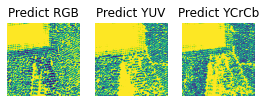

In [31]:
plt.subplot(242)
plt.imshow(pred3[0,:,:,0])
plt.title('Predict RGB')
plt.axis('off')
plt.subplot(243)
plt.imshow(pred4[0,:,:,0])
plt.title('Predict YUV')
plt.axis('off')
plt.subplot(244)
plt.imshow(pred5[0,:,:,0])
plt.title('Predict YCrCb')
plt.axis('off')


In [17]:
hitM1Ori = model1.fit(imgOri, imgOri, epochs=30, shuffle=False)
hitM2Ori = model2.fit(imgOri, imgOri, epochs=30, shuffle=False)

Epoch 1/30
1/1 [==============================] - 10s 10s/step - loss: 1.8253 - accuracy: 0.5021
Epoch 2/30
1/1 [==============================] - 7s 7s/step - loss: 1.8320 - accuracy: 0.5028
Epoch 3/30
1/1 [==============================] - 10s 10s/step - loss: 1.8375 - accuracy: 0.5013
Epoch 4/30
1/1 [==============================] - 7s 7s/step - loss: 1.8416 - accuracy: 0.4991
Epoch 5/30
1/1 [==============================] - 10s 10s/step - loss: 1.8443 - accuracy: 0.4983
Epoch 6/30
1/1 [==============================] - 6s 6s/step - loss: 1.8465 - accuracy: 0.5006
Epoch 7/30
1/1 [==============================] - 7s 7s/step - loss: 1.8479 - accuracy: 0.5030
Epoch 8/30
1/1 [==============================] - 7s 7s/step - loss: 1.8485 - accuracy: 0.5012
Epoch 9/30
1/1 [==============================] - 6s 6s/step - loss: 1.8483 - accuracy: 0.4966
Epoch 10/30
1/1 [==============================] - 7s 7s/step - loss: 1.8482 - accuracy: 0.4941
Epoch 11/30
1/1 [==========================

(-0.5, 511.5, 511.5, -0.5)

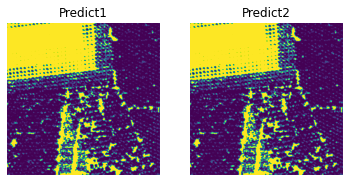

In [18]:
pred7 = model2.predict(imgOri)
pred8 = model2.predict(imgOri)

plt.subplot(121)
plt.imshow(pred7[0,:,:,0])
plt.title('Predict1')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred8[0,:,:,0])
plt.title('Predict2')
plt.axis('off')